In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time


import logistic_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from collections import defaultdict

np.random.seed(44)  # for comparison of results

In [2]:
def process_df(name):
    df = pd.read_csv(f"data/{name}.csv")
    if len(df) > 12000:
        df = df.sample(n=12000)
    df_y = df["target"]
    df_X = df.drop(columns=["target"])
    mean = df_X.mean()
    std = df_X.std()
    df_X = (df_X - mean) / std
    return df_X, df_y

In [3]:
def compare_convergence(
    X, y, algorithms=["iwls", "sgd", "adam"], k=10, test_size=0.2,
):
    final_metrics = pd.DataFrame(
        columns=[
            "Algorithm",
            "Balanced Accuracy",
        ]
    )
    after_epoch_metrics = defaultdict(list)

    for alg in algorithms:
        for i in range(k):

            # Split data and create regressor object
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size
            )
            model = logistic_regression.LogisticRegressor(
                descent_algorithm=alg
            )

            # Fit model
            model.fit(X_train, y_train, max_num_epoch=500, tolerance=1e-3)

            # Record metrics
            final_metrics.loc[len(final_metrics)] = [
                alg,
                model.balanced_accuracy(X_test, y_test),
            ]
            loss_after_epoch = model.convergence_rate
            after_epoch_metrics[alg].append(loss_after_epoch)

            print(f"Run {i+1} of {alg} completed")
    return after_epoch_metrics, final_metrics

In [4]:
def visualize_convergence(after_epoch, name, epoch_nums):
    after_epoch_processed = defaultdict(list)
    for alg_name, runs in after_epoch.items():
        for run in runs:
            zeros = np.zeros(501)
            for i in range(501):
                if i < len(run):
                    zeros[i] = run[i]
                else:
                    zeros[i] = run[-1]
            after_epoch_processed[alg_name].append(zeros)

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("husl", 3)
    counter = 0
    for alg_name, runs in after_epoch_processed.items():
        counter += 1
        runs = np.array(runs)
        plt.plot(runs.mean(axis=0)[:epoch_nums], label=alg_name, color=colors[counter - 1])
        plt.fill_between(
            range(epoch_nums),
            runs.mean(axis=0)[:epoch_nums] - runs.std(axis=0)[:epoch_nums],
            runs.mean(axis=0)[:epoch_nums] + runs.std(axis=0)[:epoch_nums],
            alpha=0.2,
            color=colors[counter - 1],
        )
    plt.legend()
    plt.title(
        f"Averaged convergence rate of different algorithms for {name} dataset",
        fontsize=15,
    )
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.savefig(f"plots/convergence/{name}.png")

In [5]:
def visualize_balanced_accuracy(metrisc_df, name):
    sns.boxplot(
        data=metrisc_df,
        x="Algorithm",
        y="Balanced Accuracy",
        palette=sns.color_palette("husl", 3),
    )
    plt.title(f"Balanced Accuracy for {name} dataset")
    plt.xlabel("Algorithm")
    plt.savefig(f"plots/accuracy/just_3/{name}_accuracy.png")

# aids

In [6]:
X, y = process_df("aids")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 202.
Run 1 of iwls completed
Early stopping criterion reached at epoch 119.
Run 1 of sgd completed
Run 1 of adam completed


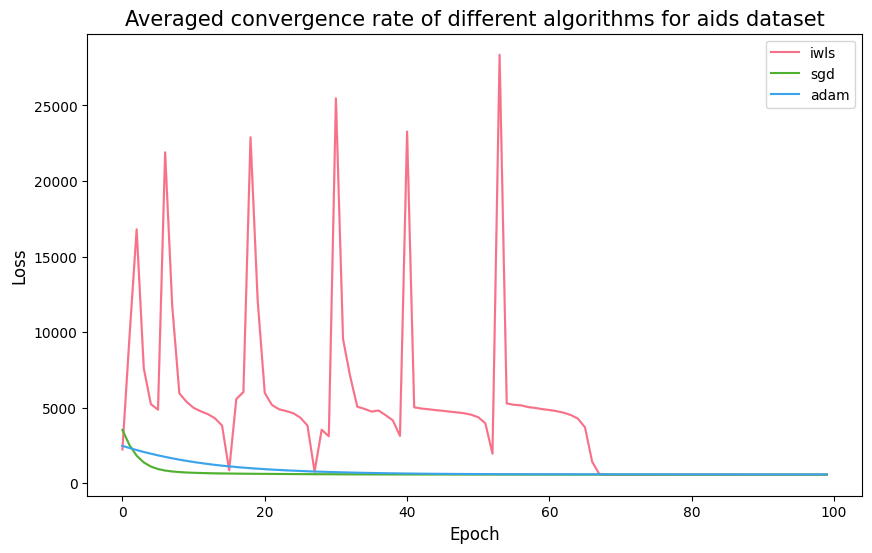

In [7]:
visualize_convergence(after_epoch, "aids", 100)

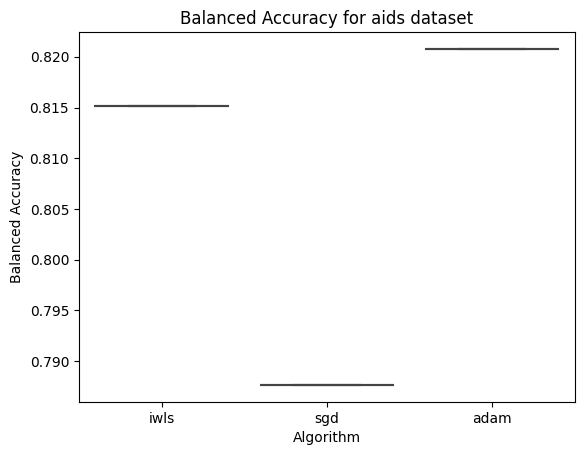

In [8]:
visualize_balanced_accuracy(metric, "aids")

# blood

In [9]:
X, y = process_df("blood")
after_epoch, metric = compare_convergence(X, y, k=1)

Run 1 of iwls completed
Early stopping criterion reached at epoch 119.
Run 1 of sgd completed
Run 1 of adam completed


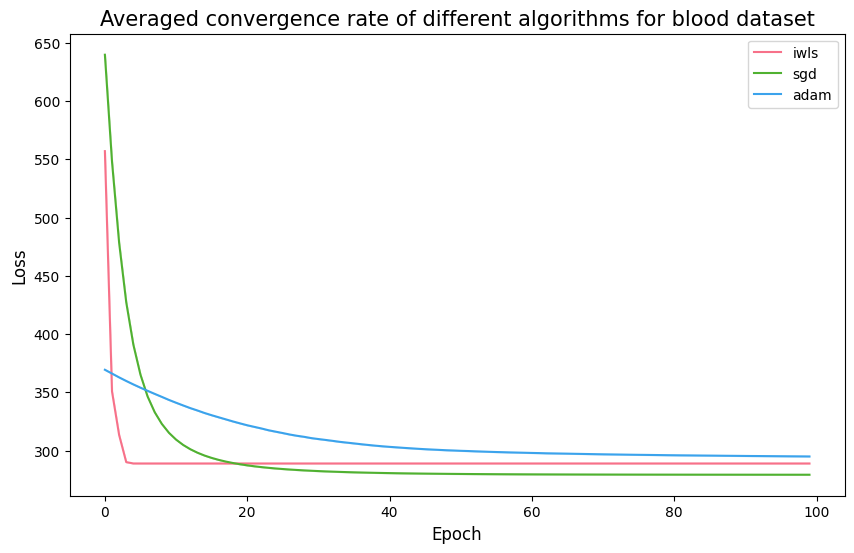

In [10]:
visualize_convergence(after_epoch, "blood", 100)

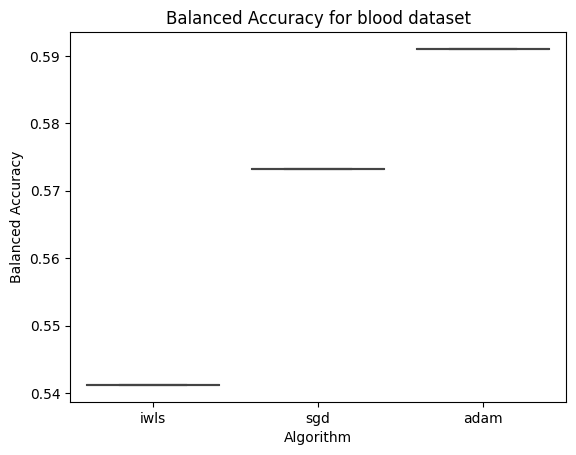

In [11]:
visualize_balanced_accuracy(metric, "blood")

# campaign 

In [12]:
X, y = process_df("campaign")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 156.
Run 1 of iwls completed
Run 1 of sgd completed
Run 1 of adam completed


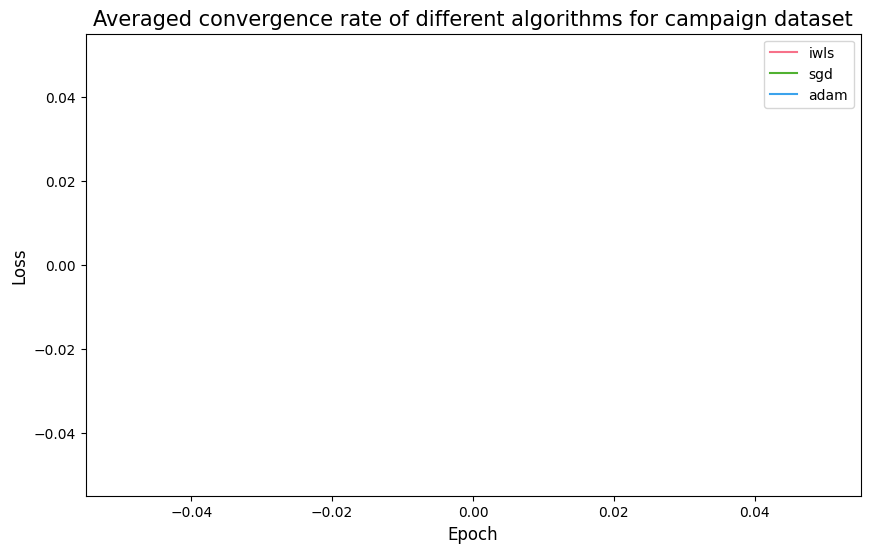

In [13]:
visualize_convergence(after_epoch, "campaign", 100)

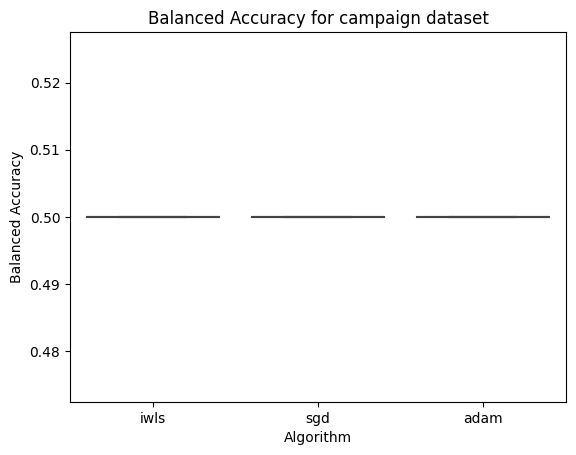

In [14]:
visualize_balanced_accuracy(metric, "campaign")

# communities and crime  

In [15]:
X, y = process_df("communities_and_crime")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 199.
Run 1 of iwls completed
Early stopping criterion reached at epoch 281.
Run 1 of sgd completed
Run 1 of adam completed


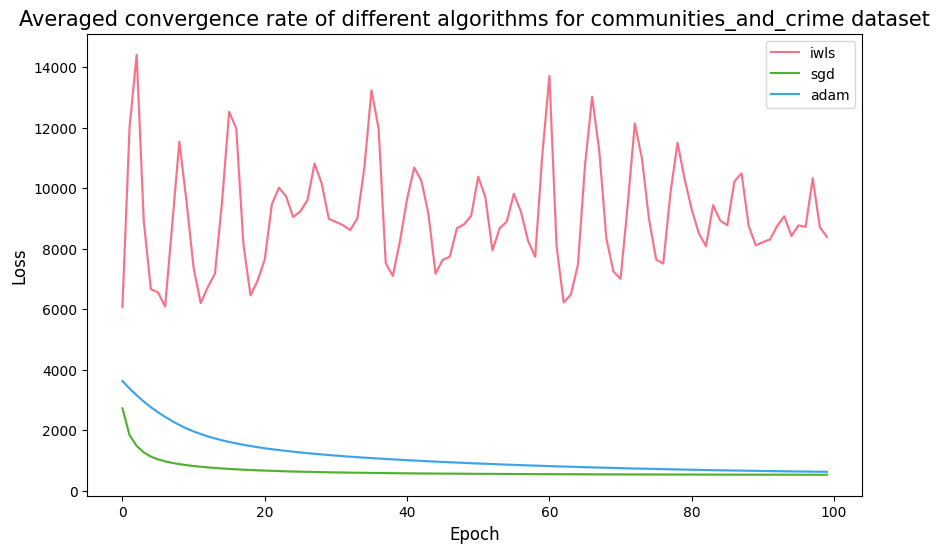

In [16]:
visualize_convergence(after_epoch, "communities_and_crime", 100)

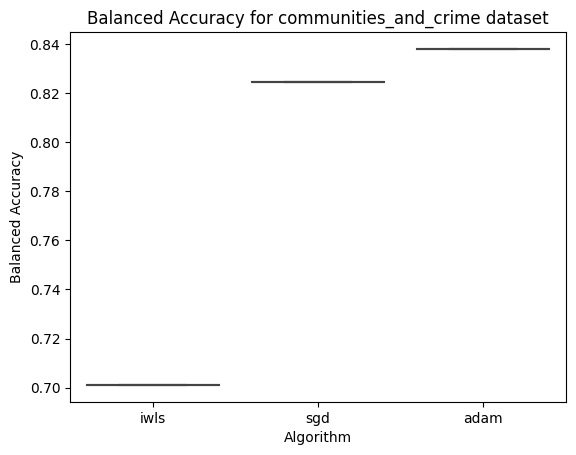

In [17]:
visualize_balanced_accuracy(metric, "communities_and_crime")

# diabetes

In [18]:
X, y = process_df("diabetes")
after_epoch, metric = compare_convergence(X, y, k=1)

Run 1 of iwls completed
Early stopping criterion reached at epoch 102.
Run 1 of sgd completed
Run 1 of adam completed


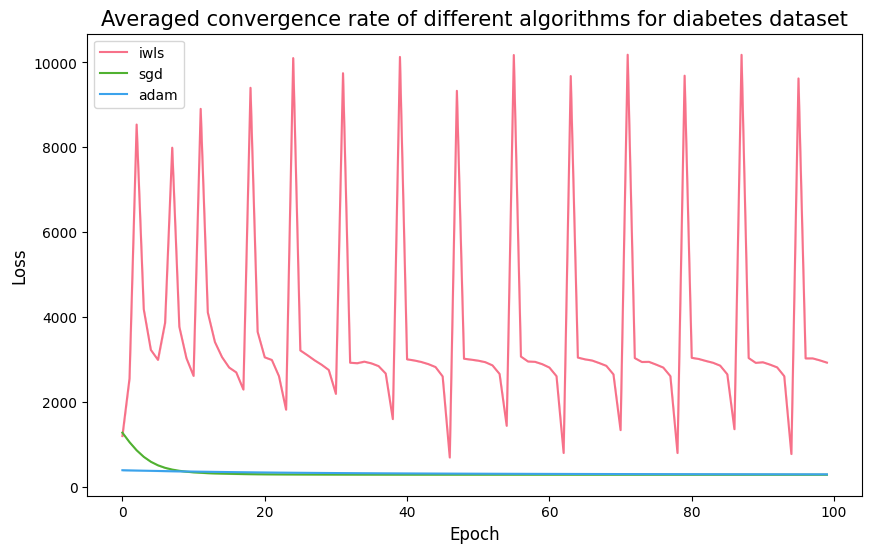

In [19]:
visualize_convergence(after_epoch, "diabetes", 100)

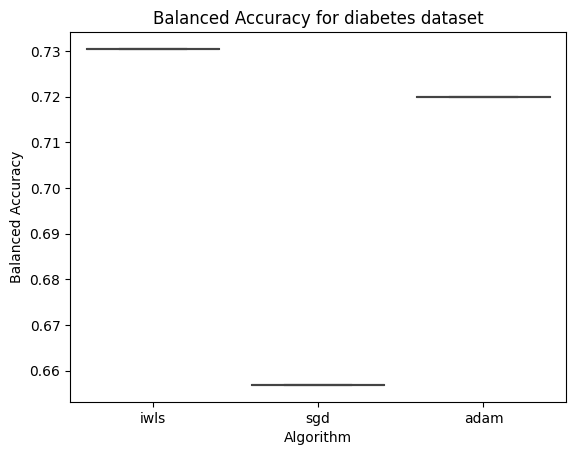

In [20]:
visualize_balanced_accuracy(metric, "diabetes")

# dry bean

In [21]:
X, y = process_df("dry_bean")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 1.
Run 1 of iwls completed
Early stopping criterion reached at epoch 74.
Run 1 of sgd completed
Run 1 of adam completed


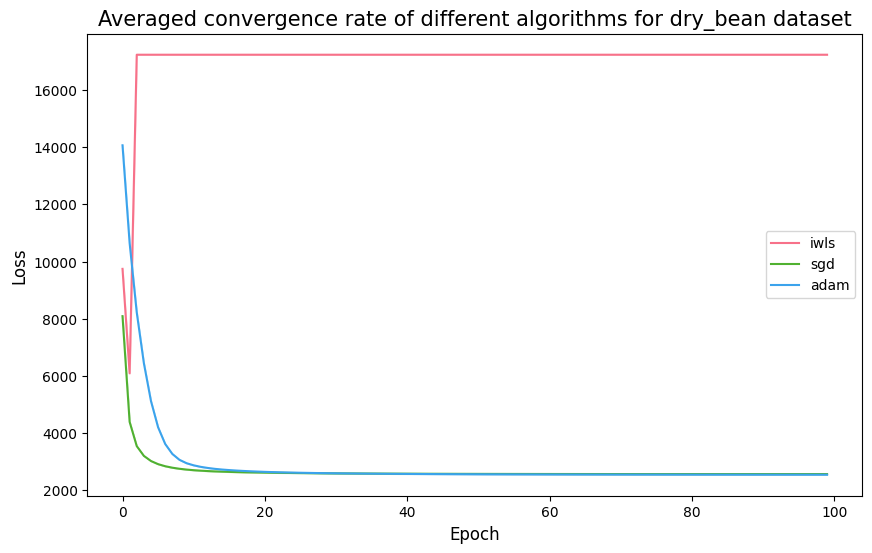

In [22]:
visualize_convergence(after_epoch, "dry_bean", 100)

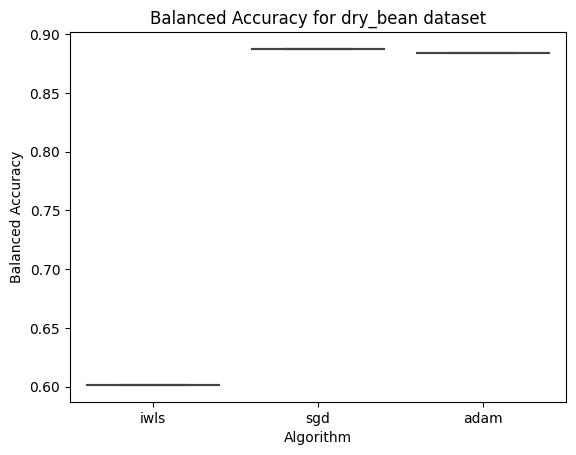

In [23]:
visualize_balanced_accuracy(metric, "dry_bean")

# heart

In [24]:
X, y = process_df("heart")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 1.
Run 1 of iwls completed
Early stopping criterion reached at epoch 28.
Run 1 of sgd completed
Run 1 of adam completed


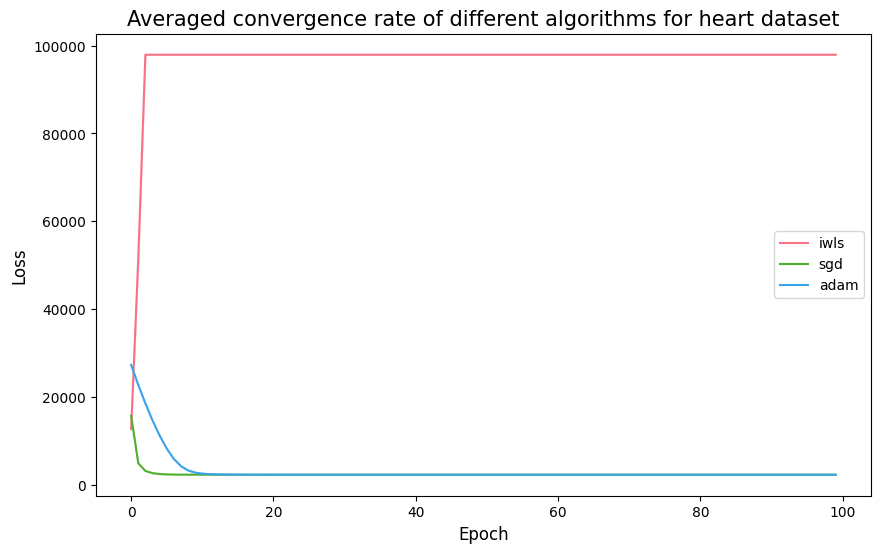

In [25]:
visualize_convergence(after_epoch, "heart", 100)

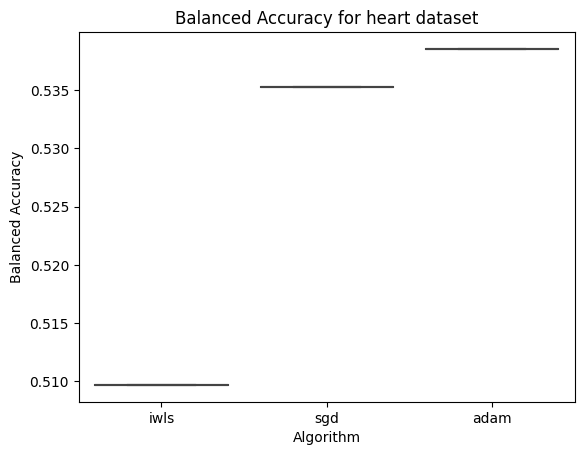

In [26]:
visualize_balanced_accuracy(metric, "heart")

# phishing

In [27]:
X, y = process_df("phishing")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 1.
Run 1 of iwls completed
Run 1 of sgd completed
Run 1 of adam completed


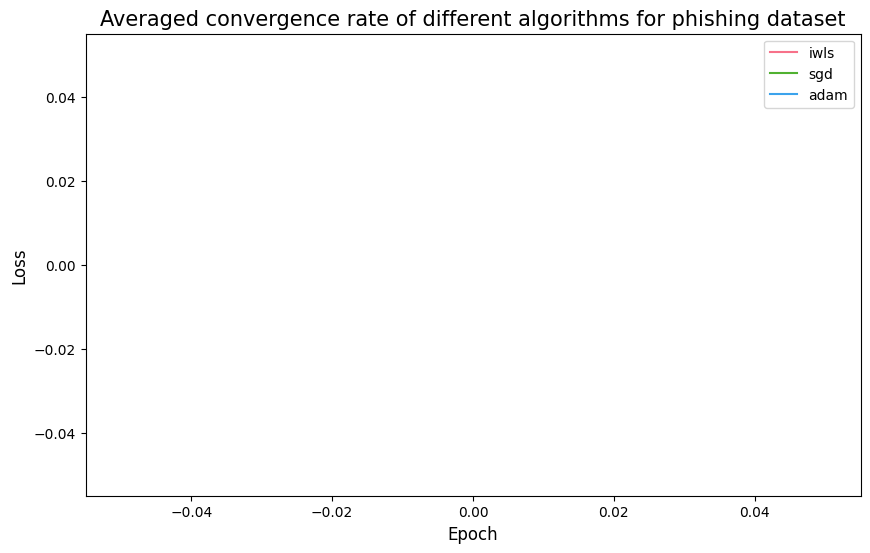

In [28]:
visualize_convergence(after_epoch, "phishing", 100)

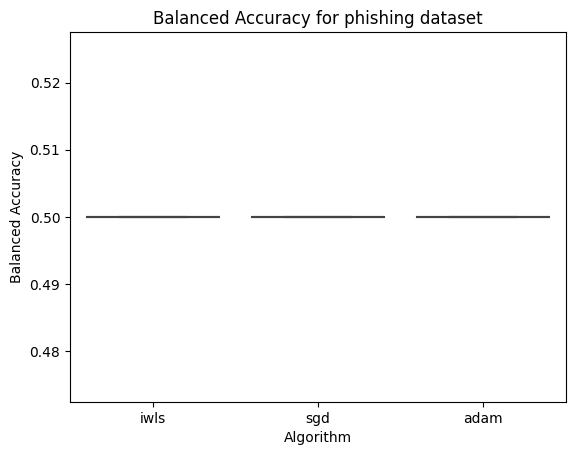

In [29]:
visualize_balanced_accuracy(metric, "phishing")

# polish_companies_bankruptcy

In [30]:
X, y = process_df("polish_companies_bankruptcy")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 1.
Run 1 of iwls completed
Run 1 of sgd completed
Run 1 of adam completed


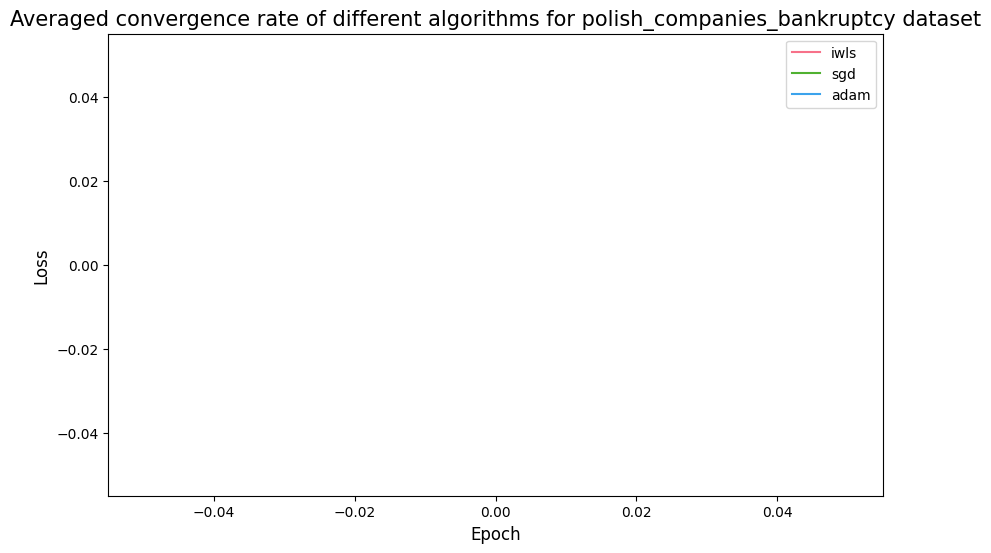

In [31]:
visualize_convergence(after_epoch, "polish_companies_bankruptcy", 100)

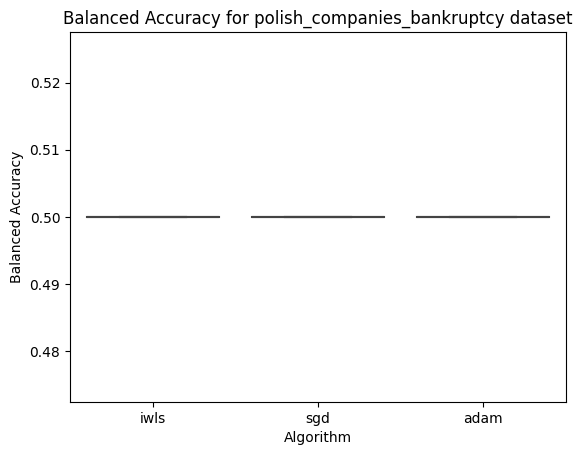

In [32]:
visualize_balanced_accuracy(metric, "polish_companies_bankruptcy")

# raisin

In [33]:
X, y = process_df("raisin")
after_epoch, metric = compare_convergence(X, y, k=1)

Run 1 of iwls completed
Early stopping criterion reached at epoch 203.
Run 1 of sgd completed
Run 1 of adam completed


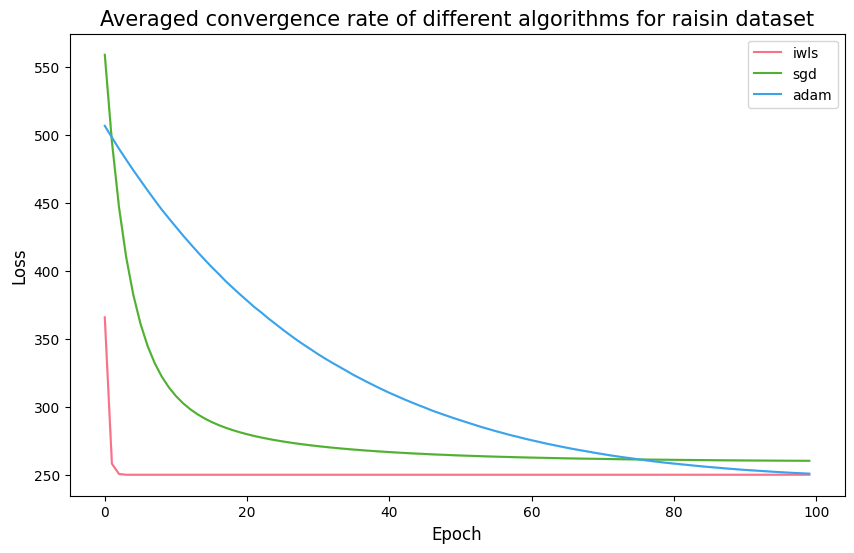

In [34]:
visualize_convergence(after_epoch, "raisin", 100)

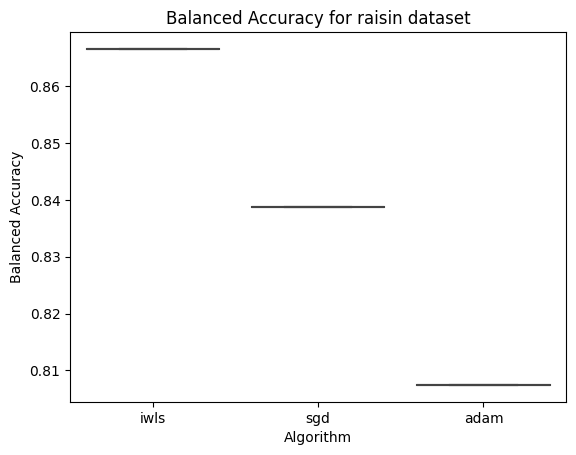

In [35]:
visualize_balanced_accuracy(metric, "raisin")

# rice

In [36]:
X, y = process_df("rice")
after_epoch, metric = compare_convergence(X, y, k=1)

Time run our at epoch 40.
Run 1 of iwls completed
Early stopping criterion reached at epoch 57.
Run 1 of sgd completed
Run 1 of adam completed


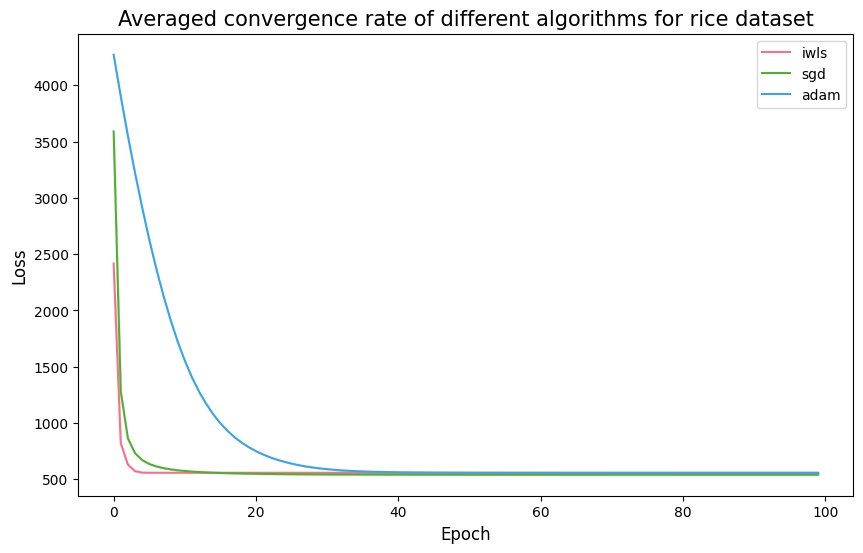

In [37]:
visualize_convergence(after_epoch, "rice", 100)

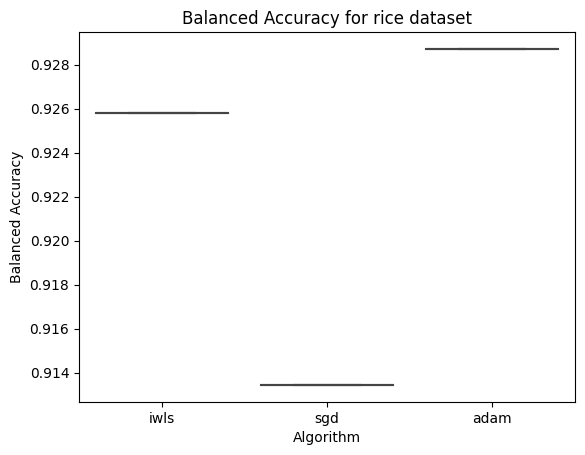

In [38]:
visualize_balanced_accuracy(metric, "rice")